# single differential $CC1p$ cross-section from begining to end

In [1]:
import sys; sys.path.insert(0, '../../'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
from onbeam_offbeam_notebooks import *
from Xsec_tools import *
%matplotlib inline
sns.set(font_scale=2);sns.set_style("whitegrid");

versions:
{   'OffBeam': 'prod_reco_optfilter_extbnb_v12_mcc8_dev',
    'OnBeam': 'prod_reco_optfilter_bnb_v12_unblind_mcc8',
    'Overlay': 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2',
    'data date': '2018_05_11',
    'date': '2018_05_11',
    'overlay date': '2018_05_11'}
OffBeam_scaling: 0.706302660161 = N(on beam)/N(off beam) before SwT
f(POT): 0.0512441465374 = N(POT on beam)/N(POT MC)


In [2]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/Xsec/Figures/1d_differential_Xsec/'

## load mc and data

In [3]:
versions['overlay date'] = '2018_08_16'
versions['Overlay'] = 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2'
selected_path = '/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/selected_events/'
prefix = selected_path + versions['Overlay'] + '_' + versions['overlay date'] + '_'
selected_cosmic_filename = 'selected_cosmic'+modified_cut_name+'.csv'
selected_overlay=dict()


if os.path.isfile(prefix+selected_cosmic_filename): 
    print 'found '+selected_cosmic_filename+', loading it...'
    for pair_type in pair_types:
        selected_overlay[pair_type]=pd.read_csv(prefix+'selected_'+pair_type+'.csv')
else:
    print 'did not find '+selected_cosmic_filename+', so creating it...'
    OverlaySamples = load_samples(date=versions['overlay date'],filename=versions['Overlay']+'_'+versions['overlay date']+'_vertices')
    reducedOverlay,pureffOverlay,pureffNumbers = apply_cuts_to_overlay(OverlaySamples=OverlaySamples, cuts_order=cuts_order
                                                                       ,minPEcut = minPEcut  
                                                                       ,maxdYZcut = maxdYZcut
                                                                       ,delta_theta_12 = delta_theta_12
                                                                       ,r_max_RdQ_CC1p = r_max_RdQ_CC1p
                                                                       ,delta_Delta_phi=delta_Delta_phi
                                                                       ,Pt_max=Pt_max
                                                                       ,Chi2Proton_muCandidate_min=Chi2Proton_muCandidate_min
                                                                       ,Chi2Proton_pCandidate_max=Chi2Proton_pCandidate_max)
    print 'applied cuts to overlay'
    for pair_type in pair_types:
        selected_overlay[pair_type] = reducedOverlay['Pt & delta phi'][pair_type]
        outcsvname = prefix+'selected_'+pair_type+modified_cut_name+'.csv'
        selected_overlay[pair_type].to_csv(outcsvname)
        print 'saved selected',pair_type,'to',outcsvname    
    # overlay scaling
    summary = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/summary/'+versions['overlay date']+'/'+versions['Overlay']+'_'+versions['overlay date']+'_summary.csv')
    Nevents['OnBeam POT'] = 4.908e+19
    Nevents['overlay']      = np.sum(summary.Nevents)
    Nevents['overlay POT']  = np.sum(summary.POT)
    Nevents['f(POT)']       = Nevents['OnBeam POT']/Nevents['overlay POT']
    print "Nevents['f(POT)']:",Nevents['f(POT)']
selected_overlay_concat = pd.concat([selected_overlay['1mu-1p'],selected_overlay['cosmic'],selected_overlay['other pairs']])    
print len(selected_overlay_concat),'events in the overlay'


versions['data date'] = '2018_08_16'
versions['beam on'] = 'prod_reco_optfilter_bnb_v12_unblind_mcc8'
versions['beam off'] = 'prod_reco_optfilter_extbnb_v12_mcc8_dev'
data_prefix = selected_path + versions['beam on'] + '_' + versions['data date'] + '_'
if os.path.isfile(data_prefix+'selected_beam_on'+modified_cut_name+'.csv'):
    print 'checked',data_prefix+'selected_on_beam'+modified_cut_name+'.csv and found the file...'
    selected_beam_on = pd.read_csv(data_prefix+'selected_beam_on'+modified_cut_name+'.csv')
    selected_beam_off = pd.read_csv(data_prefix+'selected_beam_off'+modified_cut_name+'.csv')

else:
    print 'checked',prefix+'selected_on_beam'+modified_cut_name+'.csv and there was no file there...'
    OnBeam = pd.read_csv(vertices_files_path+'/'+versions['data date']+'/'+versions['beam on']+'_'+versions['data date']+'_vertices.csv')
    print 'loaded beam-on'
    OffBeam = pd.read_csv(vertices_files_path+'/'+versions['data date']+'/'+versions['beam off']+'_'+versions['data date']+'_vertices.csv')
    print 'loaded beam-off'
    reducedOnBeam,reducedOffBeam,numbers = apply_cuts_to_data(OnBeam=OnBeam,OffBeam=OffBeam,cuts_order=cuts_order
                                                              ,minPEcut = minPEcut  
                                                              ,maxdYZcut = maxdYZcut                                                              
                                                              ,delta_theta_12 = delta_theta_12                                                              
                                                              ,r_max_RdQ_CC1p = r_max_RdQ_CC1p
                                                              ,delta_Delta_phi=delta_Delta_phi                                                              
                                                              ,Pt_max=Pt_max                                                              
                                                              ,Chi2Proton_muCandidate_min=Chi2Proton_muCandidate_min                                                              
                                                              ,Chi2Proton_pCandidate_max=Chi2Proton_pCandidate_max)
    print 'applied cuts to data'
    selected_beam_on = reducedOnBeam['Pt & delta phi']
    outcsvname = data_prefix+'selected_beam_on'+modified_cut_name+'.csv'
    selected_beam_on.to_csv(outcsvname)
    print 'saved selected beam on to',outcsvname

    selected_beam_off = reducedOffBeam['Pt & delta phi']
    outcsvname = data_prefix+'selected_beam_off'+modified_cut_name+'.csv'
    selected_beam_off.to_csv(outcsvname)
    print 'saved selected beam on to',outcsvname
    
print len(selected_beam_on),'events in the beam-on'
print len(selected_beam_off),'events in the beam-off'


if os.path.isfile(prefix+'selected_genie_CC1p'+modified_cut_name+'.csv'):
    print 'checked',prefix+'selected_genie_CC1p'+modified_cut_name+'.csv and found the file...'
    genie_CC1p = pd.read_csv(prefix+'selected_genie_CC1p'+modified_cut_name+'.csv')
else:
    genie = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/genie/'
                        +versions['overlay date']+'/'
                        +versions['Overlay']+'_'+versions['overlay date']+'_genie.csv')
    print len(genie),'events in genie'
    genie_CC1p = genie[(genie.IsCC_1p_200MeVc==True) #& (genie.IsInActiveVolume==True) 
                       & ((genie.truth_x>3) & (genie.truth_x<256))
                       & ((genie.truth_y>-115) & (genie.truth_y<115))
                       & ((genie.truth_z>5) & (genie.truth_y<1037))
                      ]
    outcsvname = prefix+'selected_genie_CC1p'+modified_cut_name+'.csv'
    genie_CC1p.to_csv(outcsvname)
    print 'saved genie_CC1p to',outcsvname
    print len(genie_CC1p),'CC1p events in genie'    
selected_CC1p = selected_overlay['CC 1p']
print len(selected_CC1p),'selected CC1p events overlay'

found selected_cosmic.csv, loading it...
checked /Users/erezcohen/Desktop/uBoone/CCQEanalysis/Xsec/selected_events/prod_reco_optfilter_bnb_v12_unblind_mcc8_2018_08_16_selected_on_beam.csv and found the file...
checked /Users/erezcohen/Desktop/uBoone/CCQEanalysis/Xsec/selected_events/prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2_2018_08_16_selected_genie_CC1p.csv and found the file...
8211 selected CC1p events overlay


In [183]:
# def smear_MC(in_sample=None,migration_maps=None,debug=0,name='smeared_mc_tmp'):
#     sam = in_sample
#     debug=0
#     smeared_Pmu_array,smeared_Pmu_theta_array,smeared_Pp_array,smeared_Pp_theta_array = [],[],[],[]
#     smeared_Pmu_cos_theta_array,smeared_Pp_cos_theta_array=[],[]
#     for i,row in sam.iterrows():

#         # smearing p(muon)
#         true_bin_j = find_bin(row['truth_Pmu'], Bins['Pmu'])
#         smeared_Pmu_array.append(choice(a=0.5*(Bins['Pmu'][1:]+Bins['Pmu'][:-1]) , p=migration_maps['Pmu'][:,true_bin_j]))
#         # smearing theta(muon)
#         true_bin_j = find_bin(180./np.pi*row['truth_Pmu_theta'], Bins['theta(mu)'])
#         smeared_Pmu_theta_array.append(np.pi/180.*choice(a=0.5*(Bins['theta(mu)'][1:]+Bins['theta(mu)'][:-1]) , p=migration_maps['Pmu_theta'][:,true_bin_j]))
#         # smearing cos(theta(muon))
#         true_bin_j = find_bin(row['truth_Pmu_cos_theta'], Bins['cos(theta(mu))'])
#         smeared_Pmu_cos_theta_array.append(choice(a=0.5*(Bins['cos(theta(mu))'][1:]+Bins['cos(theta(mu))'][:-1]) , p=migration_maps['Pmu_cos_theta'][:,true_bin_j]))
#         # smearing p(proton)
#         true_bin_j = find_bin(row['truth_Pp'], Bins['Pp'])
#         smeared_Pp_array.append(choice(a=0.5*(Bins['Pp'][1:]+Bins['Pp'][:-1]) , p=migration_maps['Pp'][:,true_bin_j]))
#         # smearing theta(proton)
#         true_bin_j = find_bin(180./np.pi*row['truth_Pp_theta'], Bins['theta(p)'])
#         smeared_Pp_theta_array.append(np.pi/180.*choice(a=0.5*(Bins['theta(p)'][1:]+Bins['theta(p)'][:-1]) , p=migration_maps['Pp_theta'][:,true_bin_j]))
#         # smearing cos(theta(p))
#         true_bin_j = find_bin(row['truth_Pp_cos_theta'], Bins['cos(theta(p))'])
#         smeared_Pp_cos_theta_array.append(choice(a=0.5*(Bins['cos(theta(p))'][1:]+Bins['cos(theta(p))'][:-1]) , p=migration_maps['Pp_cos_theta'][:,true_bin_j]))


#         if debug:
#             print 'truth_Pmu:',row['truth_Pmu']
#             print 'smeared_Pmu:',choice(a=0.5*(Bins['Pmu'][1:]+Bins['Pmu'][:-1]) , p=migration_map[:,find_bin(row['truth_Pmu'], Bins['Pmu'])])        
#             print 'truth_Pp_theta:',row['truth_Pp_theta']
#             print 'true_bin_j:',true_bin_j
#             print 'smeared_Pp_theta:',choice(a=0.5*(Bins['theta(p)'][1:]+Bins['theta(p)'][:-1]) , p=migration_map[:,true_bin_j])
#             print 'smeared_Pp_theta:',np.pi/180.*choice(a=0.5*(Bins['theta(p)'][1:]+Bins['theta(p)'][:-1]) , p=migration_map[:,true_bin_j])
#             print_line()
#     if debug:
#         print 'done looping.'
#     sam['smeared_Pmu']=smeared_Pmu_array
#     sam['smeared_Pmu_theta']=smeared_Pmu_theta_array
#     sam['smeared_Pmu_cos_theta']=smeared_Pmu_cos_theta_array
#     sam['smeared_Pp']=smeared_Pp_array
#     sam['smeared_Pp_theta']=smeared_Pp_theta_array
#     sam['smeared_Pp_cos_theta']=smeared_Pp_cos_theta_array
#     if debug:
#         print 'done smearing',name
#     sam.to_csv(prefix + name +modified_cut_name+'.csv')
#     if debug:
#         print 'saved ',name,' to\n',(prefix + name + '.csv')
#     return sam     

In [184]:
# def build_migration_map(sam=None,bins=None,xvar='',yvar='',mul=1,debug=0):
#     xbins = ybins = bins*(1./mul)
#     nbins = len(bins)-1
#     migration_map = np.zeros((nbins,nbins))
#     for ix in range(nbins):
#         xmin,xmax = xbins[ix],xbins[ix+1]  
#         sum_in_column = 0
#         for iy in range(nbins):
#             ymin,ymax = ybins[iy],ybins[iy+1]
#             sam_bin = sam[(sam[xvar]>xmin)&(sam[xvar]<xmax)&(sam[yvar]>ymin)&(sam[yvar]<ymax)]
#             migration_map[ix][iy] = float(len(sam_bin))
#             sum_in_column += migration_map[ix][iy]        
#         # now normalize the entire column to 1
#         for iy in range(nbins):
#             migration_map[ix][iy] /= sum_in_column
#     migration_map=migration_map.T
#     if debug:
#         print 'done computing migration matrix'
#         fig,ax = plt.subplots(figsize=(9.708,6))
#         sns.heatmap(migration_map,annot=True,fmt=".2f",cbar=False,cmap='jet')
#         set_axes(ax,'True bin $j$','Reconstructed bin $i$')
#         ax.invert_yaxis()
#         plt.tight_layout()
#         filename = Paths['migration maps'] + '%s_vs_%s_%d_bins'%(xvar,yvar,nbins)+modified_cut_name+'.csv'
#         np.savetxt(filename, migration_map, delimiter=",")
#         print 'saved migration map into',filename
#         print 'done building migration maps'
#     return migration_map   

In [185]:
# def compute_effiency(bins=Bins['Pmu']
#                      ,xvar='smeared_Pmu'
#                      ,xlabel='p_{\mu}'
#                      ,ylabel=r'$\bar{\epsilon}$'
#                      ,do_draw=True
#                      ,mul=1
#                      ,debug=0
#                     ):
#     mid = 0.5*(bins[1:]+bins[:-1]); bin_width=0.5*(mid[1]-mid[0])
#     h = dict()
#     h['generated'],_ = np.histogram(mul*genie_CC1p[xvar],bins=bins)
#     h['selected'],_ = np.histogram(mul*selected_CC1p[xvar],bins=bins)

#     h['eff'],h['eff err'] = [],[]
#     for i in range(len(bins)-1):
#         eff,eff_err = get_eff(Ngen=h['generated'][i],Nsel=h['selected'][i])
#         h['eff'].append(eff)
#         h['eff err'].append(eff_err)
#     if debug: print 'done computing efficiency.'
    
#     if do_draw and debug:
#         fig=plt.figure(figsize=(20,6))
#         ax=fig.add_subplot(1,2,1)
#         for label,color in zip(['generated','selected'],['forestgreen','royalblue']):
#             plt.errorbar(x=mid,xerr=bin_width,y=h[label],yerr=np.sqrt(h[label])
#                          ,color=color,capsize=10,fmt='.',markersize=0,label=label)
#         set_axes(ax,xlabel,'counts',do_add_grid=True,do_add_legend=True)

#         ax=fig.add_subplot(1,2,2)
#         plt.errorbar(x=mid,xerr=bin_width,y=h['eff'],yerr=h['eff err']
#                          ,color='black',capsize=10,fmt='.',markersize=0)
#         set_axes(ax,xlabel,ylabel,do_add_grid=True,ylim=(0,1.05*np.max(h['eff']+h['eff err'])))
#     if debug: print 'done drawing.'
    
#     # save to csv
#     np.savetxt(Paths['efficiency maps'] + "eff_%s_%d_bins"%(xvar,len(bins)-1)+modified_cut_name+".csv", h['eff'], delimiter=",")
#     np.savetxt(Paths['efficiency maps'] + "eff_err_%s_%d_bins"%(xvar,len(bins)-1)+modified_cut_name+".csv", h['eff err'], delimiter=",")
#     if debug:  print 'saved efficiency into',Paths['efficiency maps'] + "eff_%s_%d_bins"%(xvar,len(bins)-1)+modified_cut_name+".csv",'\n and uncertainty'
#     return h['eff'],h['eff err']

In [186]:
# def find_bin( x , bins ):    
#     for i in range(len(bins)-1):
#         if bins[i]<x and x<bins[i+1]:
#             return i
#     return 0

In [187]:
# def build_migration_maps():
#     migration_maps=dict()
#     migration_maps['Pmu']=build_migration_map(sam=selected_CC1p,bins=Bins['Pmu'],xvar='truth_Pmu',yvar='reco_Pmu_mcs')
#     migration_maps['Pp']=build_migration_map(sam=selected_CC1p,bins=Bins['Pp'],xvar='truth_Pp',yvar='reco_Pp')
#     migration_maps['Pmu_theta']=build_migration_map(sam=selected_CC1p,bins=Bins['theta(mu)'],xvar='truth_Pmu_theta',yvar='reco_Pmu_mcs_theta',mul=180./np.pi)
#     migration_maps['Pp_theta']=build_migration_map(sam=selected_CC1p,bins=Bins['theta(p)'],xvar='truth_Pp_theta',yvar='reco_Pp_theta',mul=180./np.pi)
#     migration_maps['Pmu_cos_theta']=build_migration_map(sam=selected_CC1p,bins=Bins['cos(theta(mu))'],xvar='truth_Pmu_cos_theta',yvar='reco_Pmu_cos_theta')
#     migration_maps['Pp_cos_theta']=build_migration_map(sam=selected_CC1p,bins=Bins['cos(theta(p))'],xvar='truth_Pp_cos_theta',yvar='reco_Pp_cos_theta')
#     return migration_maps

# def smear_MC_gen_sel(migration_maps=None):
#     smear_MC(in_sample=selected_CC1p,migration_maps=migration_maps,name='selected_CC 1p')
#     smear_MC(in_sample=genie_CC1p,migration_maps=migration_maps,name='selected_genie_CC1p')

In [190]:
# def subtrsact_bkg_1d(bins=Bins['Pmu'],xlabel='',xvar='reco_Pmu_mcs',mul=1,debug=0):
#     mid = 0.5*(bins[1:]+bins[:-1]); bin_width=0.5*(mid[1]-mid[0])
#     h,herr = dict(),dict()
    
#     # data
#     for sam,label in zip([selected_beam_off,selected_beam_on],['beam off','beam on']):
#         h[label],_ = np.histogram( mul*sam[xvar] , bins=bins )
#         herr[label] = np.sqrt(h[label])
#     # scale beam-off to beam-on exposure time
#     h['beam off'] = h['beam off']*OffBeam_scaling
#     herr['beam off'] = h['beam off']*OffBeam_scaling
    
#     # MC
#     for sam,label in zip([selected_overlay_concat,selected_overlay['CC 1p']],['overlay','CC 1p']):
#         h[label],_ = np.histogram( mul*sam[xvar] , bins=bins )
#         h[label] = h[label]*Nevents['f(POT)']
#         herr[label] = np.sqrt(h[label])*Nevents['f(POT)']

#     h['ovrelay + beam off'] = h['overlay'] + h['beam off']
#     herr['overlay + beam off'] = np.sqrt(np.square(herr['overlay']) + np.square(herr['beam off']))
#     h['background'] = h['ovrelay + beam off'] - h['CC 1p']
#     herr['background'] = np.sqrt(np.square(herr['overlay + beam off']) + np.square(herr['CC 1p']))
#     h['beam on bkg subtracted'] = h['beam on'] - h['background']
#     herr['beam on bkg subtracted'] = np.sqrt(np.square(herr['beam on']) + np.square(herr['background']))

#     if debug:
#         fig = plt.figure(figsize=(20,6))
#         ax=fig.add_subplot(1,2,1)
#         ax.bar( mid , h['overlay']+h['beam off'] , width=2*bin_width , color=Colors['beam off'], label='beam-off',alpha=0.7)
#         ax.bar( mid , h['overlay'] , width=2*bin_width, color=Colors['overlay'], label='overlay',alpha=0.7)
#         ax.bar( mid , h['CC 1p'], width=2*bin_width, color=Colors['CC 1p'], label=r'CC 1p signal')
#         ax.errorbar( x=mid , xerr=bin_width, y=h['beam on'], yerr=herr['beam on'] , fmt='o', markersize=10 
#                     , color=Colors['beam on'], capsize=1, capthick=3, label='beam-on')
#         set_axes(ax,xlabel,do_add_legend=True)
#         ylim = ax.get_ylim()

#         ax=fig.add_subplot(1,2,2)
#         ax.bar( mid , h['CC 1p'], width=2*bin_width, color=Colors['CC 1p'])
#         ax.errorbar( x=mid , xerr=bin_width, y=h['beam on bkg subtracted'], yerr=herr['beam on bkg subtracted'] , fmt='o', markersize=10 
#                     , color=Colors['beam on'], capsize=1, capthick=3, label='beam-on')
#         set_axes(ax,xlabel,do_add_legend=True,ylim=ylim)   
    
#     np.savetxt(Paths['background maps'] + "beam_on_bkg_sbtrctd_%s_%d_bins"%(xvar,len(bins)-1)+modified_cut_name+".csv", h['beam on bkg subtracted'], delimiter=",")
#     np.savetxt(Paths['background maps'] + "beam_on_bkg_sbtrctd_err_%s_%d_bins"%(xvar,len(bins)-1)+modified_cut_name+".csv", herr['beam on bkg subtracted'], delimiter=",")
#     if debug: print 'saved',"beam_on_bkg_sbtrctd_%s_%d_bins.csv"%(xvar,len(bins)-1)
    
#     np.savetxt(Paths['background maps'] + "mc_cc1p_%s_%d_bins"%(xvar,len(bins)-1)+modified_cut_name+".csv", h['CC 1p'], delimiter=",")
#     np.savetxt(Paths['background maps'] + "mc_cc1p_err_%s_%d_bins"%(xvar,len(bins)-1)+modified_cut_name+".csv", herr['CC 1p'], delimiter=",")
#     if debug: print 'saved',"mc_cc1p_%s_%d_bins.csv"%(xvar,len(bins)-1) 
#     if debug: print 'done background subtraction from data'

In [191]:
# def Xsec_diff_1d(observable='Pmu',recovar='reco_Pmu_mcs',smearedvar='',debug=0,do_draw=True):
#     bins=Bins[observable]; vlabel=vlabels[observable]; Vlabel=Vlabels[observable]; units=Units[observable]
#     xlabel=Vlabel+' ['+units+']' if units is not None else Vlabel

#     if smearedvar is '': smearedvar='smeared_'+observable
#     mul=180./np.pi if 'theta' in observable else 1
#     mid = 0.5*(bins[1:]+bins[:-1]); bin_width=0.5*(mid[1]-mid[0])
    
#     h,herr = dict(),dict()
#     h['N-B'] = np.loadtxt(Paths['background maps'] + "beam_on_bkg_sbtrctd_%s_%d_bins"%(recovar,len(bins)-1)+modified_cut_name+".csv", delimiter=",")
#     herr['N-B'] = np.loadtxt(Paths['background maps'] + "beam_on_bkg_sbtrctd_err_%s_%d_bins"%(recovar,len(bins)-1)+modified_cut_name+".csv", delimiter=",")
#     if debug: print 'read ', "beam_on_bkg_sbtrctd_%s_%d_bins"%(recovar,len(bins)-1)+modified_cut_name+".csv"

#     h['mc'] = np.loadtxt(Paths['background maps'] + "mc_cc1p_%s_%d_bins"%(recovar,len(bins)-1)+modified_cut_name+".csv", delimiter=",")
#     herr['mc'] = np.loadtxt(Paths['background maps'] + "mc_cc1p_err_%s_%d_bins"%(recovar,len(bins)-1)+modified_cut_name+".csv", delimiter=",")
#     if debug: print 'read ',"mc_cc1p_%s_%d_bins"%(recovar,len(bins)-1)+modified_cut_name+".csv"
    
#     h['eff'] = np.loadtxt(Paths['efficiency maps'] + "eff_%s_%d_bins"%(smearedvar,len(bins)-1)+modified_cut_name+".csv", delimiter=",")
#     herr['eff'] = np.loadtxt(Paths['efficiency maps'] + "eff_err_%s_%d_bins"%(smearedvar,len(bins)-1)+modified_cut_name+".csv", delimiter=",")
#     if debug: print 'read efficiency',"eff_%s_%d_bins"%(recovar,len(bins)-1)+modified_cut_name+".csv"
    
#     h['Xsec'] = h['N-B']/(h['eff']*Ntargets*flux*bin_width)
#     herr['Xsec'] = np.sqrt( np.square(herr['N-B']/(h['eff']*Ntargets*flux*bin_width))
#                             +np.square(h['N-B']*herr['eff']/(h['eff']*h['eff']*Ntargets*flux*bin_width))                           
#                             +np.square(h['N-B']*Ntargets_err/(h['eff']*Ntargets*Ntargets*flux*bin_width))
#                             +np.square(h['N-B']*flux_err/(h['eff']*Ntargets*flux*flux*bin_width)))
#     h['Xsec'],herr['Xsec'] = h['Xsec']*1e39,herr['Xsec']*1e39
    
#     h['mc'] = h['mc']/(h['eff']*Ntargets*flux*bin_width)
#     herr['mc'] = np.sqrt( np.square(herr['mc']/(h['eff']*Ntargets*flux*bin_width))
#                             +np.square(h['mc']*herr['eff']/(h['eff']*h['eff']*Ntargets*flux*bin_width))                           
#                             +np.square(h['mc']*Ntargets_err/(h['eff']*Ntargets*Ntargets*flux*bin_width))
#                             +np.square(h['mc']*flux_err/(h['eff']*Ntargets*flux*flux*bin_width)))
#     h['mc'],herr['mc'] = h['mc']*1e39,herr['mc']*1e39


#     if do_draw:
#         fig = plt.figure(figsize=(9.708,6))
#         ax=fig.add_subplot(1,1,1)
#         ax.bar( x=mid , height=2*herr['mc'], bottom=h['mc']-herr['mc'], width=2*bin_width, color=Colors['CC 1p'], label=r'mc ($\Delta$stat.)')
#         ax.errorbar( x=mid , xerr=bin_width, y=h['Xsec'], yerr=herr['Xsec'] , fmt='o', markersize=10 
#                     , color=Colors['beam on'], capsize=1, capthick=3, label='data')    
#         set_axes(ax,xlabel
#                  ,y_label=r'$\frac{d\sigma}{d'+vlabel+'}$'+r' $\left[10^{-39} \frac{cm^{2}}{(%s)}\right]$'%units
#                  ,do_add_legend=True)
    
#     np.savetxt(Paths['1d Xsec'] + "Xsec_%s_%d_bins"%(smearedvar,len(bins)-1)+modified_cut_name+".csv", h['Xsec'], delimiter=",")
#     np.savetxt(Paths['1d Xsec'] + "Xec_err_%s_%d_bins"%(smearedvar,len(bins)-1)+modified_cut_name+".csv", herr['Xsec'], delimiter=",")
#     if debug: print 'saved',"Xsec_%s_%d_bins"%(smearedvar,len(bins)-1)+modified_cut_name+".csv"

#     np.savetxt(Paths['1d Xsec'] + "mc_cc1p_Xsec_%s_%d_bins"%(smearedvar,len(bins)-1)+modified_cut_name+".csv", h['mc'], delimiter=",")
#     np.savetxt(Paths['1d Xsec'] + "mc_cc1p_Xsec_err_%s_%d_bins"%(smearedvar,len(bins)-1)+modified_cut_name+".csv", herr['mc'], delimiter=",")
#     if debug: print 'saved',"mc_cc1p_Xsec_%s_%d_bins"%(smearedvar,len(bins)-1)+modified_cut_name+".csv"
#     print 'done computing Xsec.'    

In [192]:
# def Xsec_ratio_1d(observable='Pmu',recovar='reco_Pmu_mcs',smearedvar='',debug=0,ax=None):
#     bins=Bins[observable]; vlabel=vlabels[observable]; Vlabel=Vlabels[observable]; units=Units[observable]
#     xlabel=Vlabel+' ['+units+']' if units is not None else Vlabel
#     mid = 0.5*(bins[1:]+bins[:-1]); bin_width=0.5*(mid[1]-mid[0])
    
#     h,herr = dict(),dict()
    
#     h['nominal Xsec'] = np.loadtxt(Paths['1d Xsec'] + "Xsec_%s_%d_bins.csv"%(smearedvar,len(bins)-1), delimiter=",")
#     herr['nominal Xsec'] = np.loadtxt(Paths['1d Xsec'] + "Xec_err_%s_%d_bins.csv"%(smearedvar,len(bins)-1), delimiter=",")
#     if debug: print 'read',"Xsec_%s_%d_bins.csv"%(smearedvar,len(bins)-1)
#     h['modified Xsec'] = np.loadtxt(Paths['1d Xsec'] + "Xsec_%s_%d_bins"%(smearedvar,len(bins)-1)+modified_cut_name+".csv", delimiter=",")
#     herr['modified Xsec'] = np.loadtxt(Paths['1d Xsec'] + "Xec_err_%s_%d_bins"%(smearedvar,len(bins)-1)+modified_cut_name+".csv", delimiter=",")
#     if debug: print 'read',"Xsec_%s_%d_bins"%(smearedvar,len(bins)-1)+modified_cut_name+".csv"


#     h['nominal mc'] = np.loadtxt(Paths['1d Xsec'] + "mc_cc1p_Xsec_%s_%d_bins.csv"%(smearedvar,len(bins)-1), delimiter=",")
#     herr['nominal mc'] = np.loadtxt(Paths['1d Xsec'] + "mc_cc1p_Xsec_err_%s_%d_bins.csv"%(smearedvar,len(bins)-1), delimiter=",")
#     if debug: print 'read',"mc_cc1p_Xsec_%s_%d_bins.csv"%(smearedvar,len(bins)-1)
#     h['modified mc'] = np.loadtxt(Paths['1d Xsec'] + "mc_cc1p_Xsec_%s_%d_bins"%(smearedvar,len(bins)-1)+modified_cut_name+".csv", delimiter=",")
#     herr['modified mc'] = np.loadtxt(Paths['1d Xsec'] + "mc_cc1p_Xsec_err_%s_%d_bins"%(smearedvar,len(bins)-1)+modified_cut_name+".csv", delimiter=",")
#     if debug: print 'read',"mc_cc1p_Xsec_%s_%d_bins"%(smearedvar,len(bins)-1)+modified_cut_name+".csv"

#     print 'done reading Xsec.'
#     if ax is None:
#         fig,ax = plt.subplots(figsize=(9.708,6))
#     for slabel,color in zip(['mc','Xsec'],[Colors['CC 1p'],Colors['beam on']]):
#         h['ratio '+slabel] = h['modified '+slabel]/h['nominal '+slabel]
#         herr['ratio '+slabel] = h['ratio '+slabel]*np.sqrt( np.square(herr['nominal '+slabel]/h['nominal '+slabel]) 
#                                                            + np.square(herr['modified '+slabel]/h['modified '+slabel]) )
#         if debug:
#             print "h[nominal "+slabel+"]:",h['nominal '+slabel]
#             print "herr[nominal "+slabel+"]:",herr['nominal '+slabel]
#             print "h[modified "+slabel+"]:",h['modified '+slabel]
#             print "herr[modified "+slabel+"]:",herr['modified '+slabel]
#             print "h[ratio "+slabel+"]:",h['ratio '+slabel]
#             print "herr[ratio "+slabel+"]:",herr['ratio '+slabel]
#         ax.errorbar( x=mid , xerr=bin_width, y=h['ratio '+slabel], yerr=herr['ratio '+slabel] 
#                     , fmt='o', markersize=10 , color=color, capsize=1, capthick=3, label='data')    
#     set_axes(ax,xlabel,y_label=r'Xsec. ratio',do_add_legend=False,title=modified_cut_label)    
#     print 'done ploting Xsec. ratio'

In [193]:
# def full_chain_Xsec_diff_1d(observable='Pmu',truth_var='truth_Pmu',recovar='reco_Pmu_mcs',smearedvar='',mul=1,ax=None):
#     bins=Bins[observable]; vlabel=vlabels[observable]; Vlabel=Vlabels[observable]; units=Units[observable]
#     xlabel=Vlabel+' ['+units+']' if units is not None else Vlabel

#     # (1) background subtraction    
#     subtrsact_bkg_1d(bins=bins,xlabel=xlabel,xvar=recovar,debug=0)
    
#     # (2) efficiency:
#     compute_effiency(bins=bins,xvar=smearedvar,xlabel=xlabel,ylabel=r'$\bar{\epsilon}$',do_draw=True,mul=mul,debug=0)    
    
#     # (3) cross-section
#     Xsec_diff_1d(observable=observable,recovar=recovar,smearedvar=smearedvar,debug=0,do_draw=False)
    
#     # (4) ratio of cross-section to nominal Xsec
#     Xsec_ratio_1d(observable=observable,recovar=recovar,smearedvar=smearedvar,debug=0,ax=ax)

## 1d cross-section

In [227]:
cuts_order  = ['no cut','Chi2Proton','Nflashes','MatchedFlash','length','non-collinearity','vertex activity','delta phi','Pt & delta phi']
minPEcut = 150 
maxdYZcut = 200 
delta_theta_12 = 55 
r_max_RdQ_CC1p = 0.43
delta_Delta_phi=35 
Pt_max=0.35        
Chi2Proton_muCandidate_min=80 
Chi2Proton_pCandidate_max=30 

extra_name,extra_label = 'minPEcut_200_',r'$N_{PE} >$ 150 $ \to $ 200'
minPEcut = 200
# modified_cut_name,modified_cut_label = 'maxdYZcut_250_',r'$d_{yz} <$ 200 cm$ \to $ 250 cm'
# maxdYZcut = 250
# modified_cut_name,modified_cut_label = 'delta_theta_12_60_',r'$35^0 < \theta_{12} < 145^0$ $ \to $ $30^0 < \theta_{12} < 150^0$'
# delta_theta_12 = 60
# modified_cut_name,modified_cut_label = 'r_max_RdQ_CC1p_0.48_',r'$r_{\Delta Q} < 0.43$ $ \to $ $0.48$'
# r_max_RdQ_CC1p = 0.48
# modified_cut_name,modified_cut_label = 'delta_Delta_phi_40_',r'$145^0<\Delta\phi<215^0$ $ \to $ $140^0<\Delta\phi<220^0$'
# delta_Delta_phi = 40
# modified_cut_name,modified_cut_label = 'Pt_max_0.4_',r'$p_t < 0.35$ GeV/c $ \to $ $0.4$ GeV/c'
# Pt_max = 0.4
# modified_cut_name,modified_cut_label = 'Chi2Proton_pCandidate_max_40_',r'$(\chi^2_p)^p <$ 30 $ \to $ 40'
# Chi2Proton_pCandidate_max = 40
print 'computing Xsec. for',modified_cut_name

computing Xsec. for _Chi2Proton_pCandidate_max_40


In [ ]:
selected_overlay,selected_overlay_concat,selected_CC1p,genie_CC1p,selected_beam_on,selected_beam_off = load_mc_and_data(extra_name=extra_name
                                                                                                                        ,)

In [228]:
migration_maps = build_migration_maps()
smear_MC_gen_sel(migration_maps=migration_maps)
print 'done smearing MC generated and selected'

done smearing MC generated and selected


In [229]:
print prefix+'selected_genie_CC1p.csv'
genie_CC1p = pd.read_csv(prefix+'selected_genie_CC1p'+modified_cut_name+'.csv')
selected_CC1p = pd.read_csv(prefix+'selected_CC1p'+modified_cut_name+'.csv')

/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/selected_events/prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2_2018_08_16_selected_genie_CC1p.csv


# Xsec.

done computing Xsec.
done reading Xsec.
done ploting Xsec. ratio
done computing Xsec.
done reading Xsec.
done ploting Xsec. ratio
done computing Xsec.
done reading Xsec.
done ploting Xsec. ratio
done computing Xsec.
done reading Xsec.
done ploting Xsec. ratio


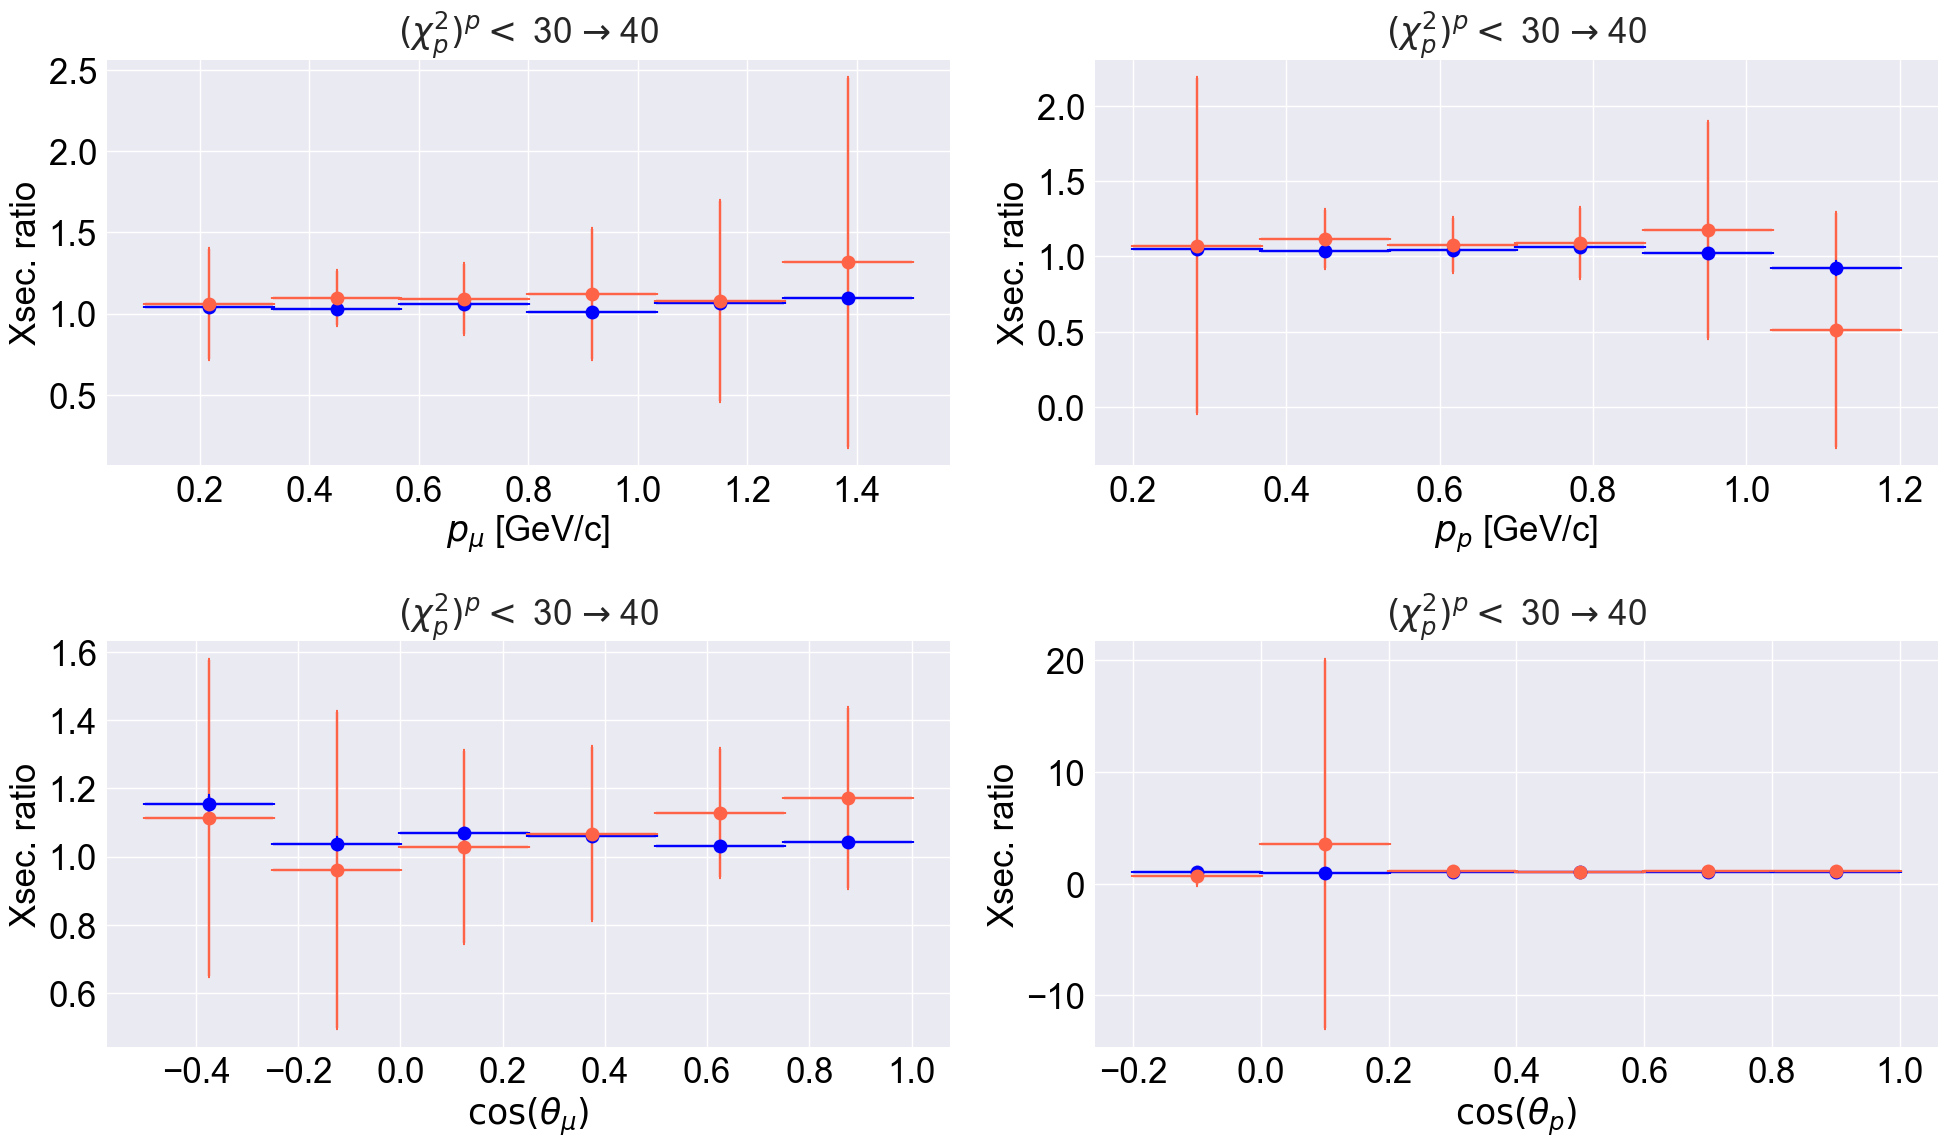

In [230]:
fig=plt.figure(figsize=(20,12))
ax=fig.add_subplot(2,2,1)
full_chain_Xsec_diff_1d(observable='Pmu',recovar='reco_Pmu_mcs',smearedvar='smeared_Pmu',ax=ax)
ax=fig.add_subplot(2,2,2)
full_chain_Xsec_diff_1d(observable='Pp',recovar='reco_Pp',smearedvar='smeared_Pp',ax=ax)
ax=fig.add_subplot(2,2,3)
full_chain_Xsec_diff_1d(observable='cos(theta(mu))',recovar='reco_Pmu_cos_theta',smearedvar='smeared_Pmu_cos_theta',ax=ax)
ax=fig.add_subplot(2,2,4)
full_chain_Xsec_diff_1d(observable='cos(theta(p))',recovar='reco_Pp_cos_theta',smearedvar='smeared_Pp_cos_theta',ax=ax)
plt.tight_layout()